# LAB | Two Sample Hypothesis Tests

### Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np
import scipy.stats as st


## Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../data/pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [10]:
# Your code here:
print(len(pokemon))
pokemon.head()


800


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [12]:
# Your code here:
legendary = pokemon[pokemon["Legendary"] == True]
not_legendary = pokemon[pokemon["Legendary"] == False]
print(f"The number of legendary pokemons = {len(legendary)}, non-legendary = {len(not_legendary)}")

The number of legendary pokemons = 65, non-legendary = 735


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [33]:
# Your code here:
mean_legendary = np.mean(legendary["Total"])
mean_not_legendary = np.mean(not_legendary["Total"])

std_legendary = np.std(legendary["Total"])
std_not_legendary = np.std(not_legendary["Total"])

stats_legend_df = pd.DataFrame({
    "Legendary": [len(legendary), mean_legendary, std_legendary],
    "Not_Legendary": [len(not_legendary), mean_not_legendary, std_not_legendary]
}, index=["Number", "Mean", "Std"])

stats_legend_df


,Legendary,Not_Legendary
Number,65.000000,735.000000
Mean,637.384615,417.213605
Std,60.466823,106.687767


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [25]:
# Your code here:

st.ttest_ind(legendary["Total"], not_legendary["Total"], equal_var= False)

TtestResult(statistic=np.float64(25.8335743895517), pvalue=np.float64(9.357954335957446e-47), df=np.float64(102.79988763435729))

What do you conclude from this test? Write your conclusions below.

In [ ]:
# Your conclusions here:
# As the p-value is significantly less than 0.05, we reject the assumption that the total scores of Legendary and non-Legendary Pokémon are equal.
# Additionally, the large t-statistic (25.83) further supports the idea that there is a substantial difference between the two groups in terms of their total scores.

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [27]:
# Your code here:
pokemon["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [35]:
# Your code here:
water_pokemons = pokemon[pokemon["Type 1"] == "Water"]
other_pokemons = pokemon[pokemon["Type 1"] != "Water"]

mean_water = np.mean(water_pokemons["Total"])
mean_other = np.mean(other_pokemons["Total"])

std_water = np.std(water_pokemons["Total"])
std_other = np.std(other_pokemons["Total"])

stats_type1_df = pd.DataFrame({
    "Water": [len(water_pokemons), mean_water, std_water],
    "Other": [len(other_pokemons), mean_other, std_other]
}, index=["Number", "Mean", "Std"])

stats_type1_df

,Water,Other
Number,112.000000,688.000000
Mean,430.455357,435.859012
Std,112.681828,121.003648


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [36]:
# Your code here:
st.ttest_ind(water_pokemons["Total"], other_pokemons["Total"], equal_var= False)

TtestResult(statistic=np.float64(-0.4638681676327303), pvalue=np.float64(0.6433915385821449), df=np.float64(155.34464861001226))

Write your conclusion below.

In [ ]:
# Your conclusions here:
# Since the p-value (0.64) is much greater than 0.05, we cannot reject the assumption that the total scores of Water and non-Water Pokémon are equal.
# The t-statistic is also very small (approximately -0.46), indicating no significant difference between the groups.

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [38]:
# Your code here:
st.ttest_rel(pokemon["Attack"], pokemon["Defense"])

TtestResult(statistic=np.float64(4.325566393330478), pvalue=np.float64(1.7140303479358558e-05), df=np.int64(799))

Describe the results of the test in the cell below.

In [ ]:
# Your conclusions here:
# Attack vs Defense: The paired t-test for comparing Attack and Defense yields a p-value of approximately 1.71e-05. Since this is well below the standard significance threshold of 0.05, we conclude that there is a statistically significant difference between the Attack and Defense statistics across all Pokémon.


We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [41]:
# Your code here:
st.ttest_rel(pokemon['Sp. Atk'], pokemon['Sp. Def'])

TtestResult(statistic=np.float64(0.853986188453353), pvalue=np.float64(0.3933685997548122), df=np.int64(799))

Describe the results of the test in the cell below.

In [ ]:
# Your conclusions here:
# Sp. Atk vs Sp. Def: In contrast, the paired t-test for comparing Sp. Atk and Sp. Def yields a p-value of approximately 0.393. This value is much higher than 0.05, indicating that there is no statistically significant difference between the Sp. Atk and Sp. Def statistics.

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [43]:
# Your code here:
diff = pokemon["Attack"] - pokemon["Defense"]
st.ttest_1samp(diff, popmean=0)

TtestResult(statistic=np.float64(4.325566393330478), pvalue=np.float64(1.7140303479358558e-05), df=np.int64(799))

In [ ]:
# The p-value from the one-sample t-test (1.71e-05) is extremely small and matches the p-value from ttest_rel.
# This indicates that we reject the null hypothesis of no difference, confirming that there is a statistically significant difference between Attack and Defense.


# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [46]:
# Your code here:
contingency_table = pd.crosstab(
    pokemon['Legendary'],
    pokemon['Type 1'] == 'Water', 
    rownames=['Legendary'],
    colnames=['Type 1 is Water']
)

contingency_table.columns = ['Not Water', 'Water']
contingency_table.index = ['Not Legendary', 'Legendary']

print(contingency_table)

               Not Water  Water
Not Legendary        627    108
Legendary             61      4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [48]:
# Your code here:
chi2, p, dof, expected = st.chi2_contingency(contingency_table)

print("\nChi-Squared Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Chi-Squared Statistic: 2.9429200762850503
p-value: 0.08625467249550985
Degrees of Freedom: 1
Expected Frequencies:
[[632.1 102.9]
 [ 55.9   9.1]]


Based on a 95% confidence, should we reject the null hypothesis?

In [49]:
# Your answer here:
# Based on the p-value (0.086), which is greater than 0.05, we do not have enough evidence to conclude that there is a statistically significant association between the categorical variables 'Legendary' and 'Type 1: Water'.


Expected Frequencies:
               Not Water  Water
Not Legendary      632.1  102.9
Legendary           55.9    9.1

Chi-Square Contributions:
               Not Water     Water
Not Legendary   0.041149  0.252770
Legendary       0.465295  2.858242


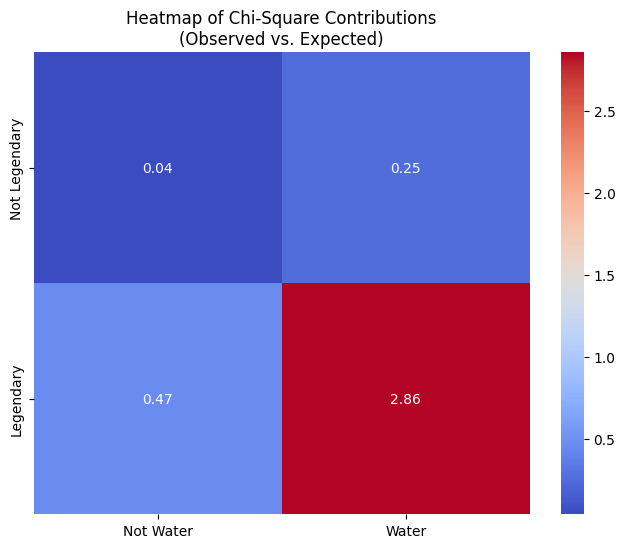

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)


contrib = (contingency_table - expected_df) ** 2 / expected_df

contrib_df = pd.DataFrame(contrib, index=contingency_table.index, columns=contingency_table.columns)

print("\nExpected Frequencies:")
print(expected_df)
print("\nChi-Square Contributions:")
print(contrib_df)

plt.figure(figsize=(8, 6))
sns.heatmap(contrib_df, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Chi-Square Contributions\n(Observed vs. Expected)")
plt.show()

In [ ]:
# The cell for Legendary & Water contributes the most (≈2.86) out of total Chi-Squared Statistic 2.9429, indicating that this cell's observed frequency deviates notably from its expected frequency.

# The remaining cells contributed much less (0.04, 0.25, and 0.47).

# Although the Legendary-Water cell shows the largest deviation, the overall chi-squared statistic remains too low to declare a significant association between the variables at the 0.05 significance level.